C:\Users\m-l.sow\AppData\Local\Temp\ipykernel_29364\2311328506.py:11: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  donnees = pd.read_csv('C:/Miage/ML/projet/Biblio.csv', usecols=cols,sep=";")


langue                         object
titre                          object
date                           object
libelle_v_smart_et_webopac     object
nombre_de_pret_total          float64
nombre_d_exemplaires          float64
categorie_statistique_1        object
dtype: object
(1325, 7)
(1325, 3)
(1325, 7)
(1325, 3)
(1325, 3)


C:\Users\m-l.sow\AppData\Local\Temp\ipykernel_29364\2311328506.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees['cluster'] = y_predicted


     langue                                              titre  date  \
0  français  Pertinences de la psychanalyse appliquée | Tex...  2003   
1   anglais  Can you hear me ? | Enregistrement sonore | Le...  1987   
2  français  Très bien, merci  | Images animées | Emmanuell...  2008   
3   anglais  The Texas-Jerusalem crossroads | Enregistremen...  2001   
5  français  Histoire des faits économiques et sociaux | 1 ...  1976   

  libelle_v_smart_et_webopac  nombre_de_pret_total  nombre_d_exemplaires  \
0          Livre pour adulte                   7.0                   1.0   
1             Disque compact                   3.0                   1.0   
2     DVD-vidéo tous publics                 587.0                   7.0   
3             Disque compact                  38.0                   2.0   
5          Livre pour adulte                   7.0                   1.0   

                    categorie_statistique_1  cluster  
0                          D103 Psychologie        0  


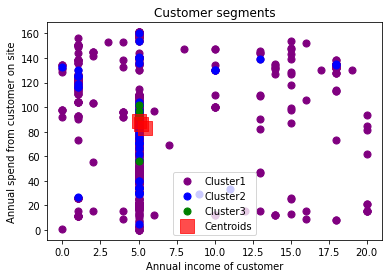

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pickle

cols = [x for x in range (37)]
#donnees=pd.read_csv('/content/drive/MyDrive/Biblio.csv', usecols=cols,sep=";")
donnees = pd.read_csv('C:/Miage/ML/projet/Biblio.csv', usecols=cols,sep=";")
donnees.drop(['isbn','issn','ean','edition','ndeg','co_auteur_nom','co_auteur_prenom' ,'dates', 'auteur_secondaire_nom', 'auteur_secondaire_prenom',
  'auteur_secondaire_dates', 'auteur_collectivite', 'subdivision_auteur_collectivite', 'co_auteur_collectivite', 'subdivision_co_auteur_collectivite',
  'auteur_secondaire_collectivite', 'subdivision_auteur_secondaire_collectivite', 'cote_majoritaire',
  'nombre_de_localisations', 'titre_de_serie', 'auteur_nom', 'auteur_prenom', 'auteur_dates', 'indice', 'nombre_de_prets_2017', 'collection',
   'format', 'editeur', 'ndeg_de_notice','nombre_de_pret_annee_2018_au_26_juillet_2018'], axis=1,inplace=True)
print(donnees.dtypes)
donnees.drop(donnees.tail(814000).index,inplace=True)

Encoder =preprocessing.LabelEncoder()
donnees=donnees.dropna(axis = 0, how ='any')
data=donnees[['langue','categorie_statistique_1','nombre_de_pret_total']]
print(donnees.shape)
print(data.shape)
data=data.dropna(axis = 0, how ='any')
#donnees=donnees.dropna(axis = 0, how ='any')
print(donnees.shape)
print(data.shape)

data["langue"]=Encoder.fit_transform(data["langue"] )
data["categorie_statistique_1"]=Encoder.fit_transform(data["categorie_statistique_1"])
X = data
print(X.shape)

model = KMeans(n_clusters=3, random_state=42)
# fit the model

model.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, 
       random_state=42, tol=0.0001, verbose=0)
# predict the values
y_predicted = model.fit_predict(X)
# add the new column to the dataframe

donnees['cluster'] = y_predicted
data['cluster']=y_predicted
print(donnees.head())

X = X.values
# Visualizing the clusters for k=3
plt.scatter(X[y_predicted==0,0],X[y_predicted==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_predicted==1,0],X[y_predicted==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_predicted==2,0],X[y_predicted==2,1],s=50, c='green',label='Cluster3')
#plt.scatter(X[y_predicted==3,0],X[y_predicted==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()
# check the data type of the 'cluster'
donnees['cluster'].dtypes
# change the data type
donnees = donnees['cluster'].astype(object)
# serializing our model to a file called model.pkl
pickle.dump(model, open("model.pkl","wb"))